In [1]:
# Lecture Week 3 Mon 10/14

##  discrete does not mean "outcomes are equally likely"

## visualizing counts, probability and probability density

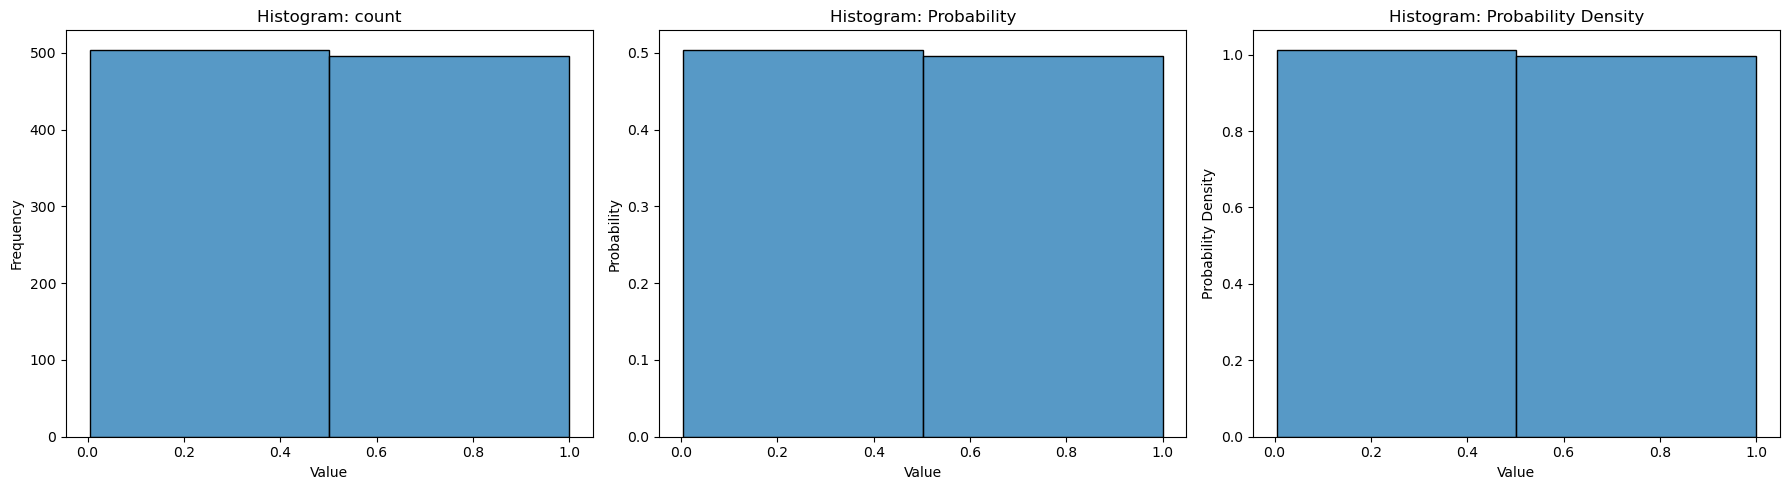

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate data from a uniform distribution
np.random.seed(42)
N = 1000
data = np.random.uniform(0, 1, N)
nbins = 2

# Create a 1x3 figure to show different types of histograms
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot histogram showing frequency
# axs[0].hist(data, bins=20, edgecolor='black')
sns.histplot(data, bins=nbins, edgecolor='black', ax=axs[0])
axs[0].set_title('Histogram: count')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# show probability
#  bar heights sum to 1
sns.histplot(data, bins=nbins, edgecolor='black', stat='probability', ax=axs[1])
axs[1].set_title('Histogram: Probability')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Probability')

# Plot histogram showing probability density
#  area under the histogram sums to 1
sns.histplot(data, bins=nbins, edgecolor='black', stat='density', ax=axs[2])
axs[2].set_title('Histogram: Probability Density')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Probability Density')


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [5]:
import numpy as np
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [6]:
arr + 1

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

In [7]:
np.max(arr)

9

In [8]:
arr.max()

9

In [9]:
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [10]:
arr.max(axis=0)

array([7, 8, 9])

In [11]:
arr.max(axis=1)

array([3, 6, 9])

In [12]:
arr.max(axis=0).mean()

8.0

In [13]:
arr%2

array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]])

In [16]:
mask = arr%2 == 0
mask

array([[False,  True, False],
       [ True, False,  True],
       [False,  True, False]])

In [18]:
arr[mask]

array([2, 4, 6, 8])

In [19]:
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [20]:
arr[mask] = 0

In [21]:
arr

array([[1, 0, 3],
       [0, 5, 0],
       [7, 0, 9]])

In [24]:
mask

array([[False,  True, False],
       [ True, False,  True],
       [False,  True, False]])

In [22]:
~mask

array([[ True, False,  True],
       [False,  True, False],
       [ True, False,  True]])

In [25]:
np.sum(mask)

4

In [ ]:
# throw 3 dice, what is the probability that 
# the maximum value is larger than 4

In [49]:
N = 10
x = np.random.randint(1,7,(N,3))
# x

In [50]:
# x.max(axis=1)

In [51]:
# x.max(axis=1)>4

In [52]:
np.sum(x.max(axis=1)>4)/N

0.8

In [54]:
x

array([[1, 3, 3],
       [1, 5, 4],
       [5, 4, 1],
       [3, 6, 2],
       [5, 1, 1],
       [5, 5, 3],
       [2, 4, 6],
       [5, 1, 2],
       [1, 1, 1],
       [1, 5, 5]])

In [55]:
x.max(axis=1).mean()

4.6

## Variance

Variance quantifies the spread of a distribution around its mean, reflecting the variability of the random variable. $\text{Var}(X) = E[(X - E[X])^2]$

We have $\text{Var}(aX) = a^2 \text{Var}(X)$ for any constant $a$.

We have $\text{Var}(X) = \text{Var}(X+a)$ for any constant $a$.


### How to estimate the variance of a random variable from data?

One common approach is to use the sample variance: if $X_1, X_2, \ldots, X_n$ are i.i.d. samples of $X$. Let $\bar{X}$ be the sample mean, then the sample variance $S^2 = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})^2$ is an estimator of $\text{Var}(X)$. 

Note: you might see 1/(n-1) instead of 1/n in the definition of sample variance. For large n, the difference is negligible. 

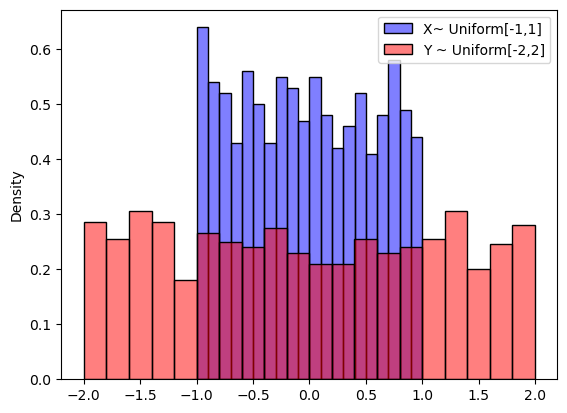

In [56]:
# which one has larger variance
# plot density of uniform[-1,1] and uniform[-2,2] on same plot
x = np.random.uniform(-1, 1, 1000)
y = np.random.uniform(-2, 2, 1000)
sns.histplot(x, bins=20, color='blue', alpha=0.5, stat='density')
sns.histplot(y, bins=20, color='red', alpha=0.5, stat='density')
# add legend
plt.legend(['X~ Uniform[-1,1]', 'Y ~ Uniform[-2,2]'])
plt.show()



In [57]:
np.var(x)

0.3430049688218168

In [58]:
np.var(y)

1.3963040878656736

## Standard Deviation

The standard deviation is the square root of the variance, $\sigma^2 = \text{Var}(X)$, providing a measure of the spread of a distribution in the same units as the random variable.

## Covariance

Covariance provides a measure of how two random variables change together. For example, if we treat weight and height as random variables, then knowing that someone is taller than average might make it more likely that they have above-average weight.

For random variables $X$ and $Y$, the covariance is defined as $\text{Cov}(X, Y) = E[(X - E[X])(Y - E[Y])]$.


0.9702753797001074
[[1.         0.97027538]
 [0.97027538 1.        ]]


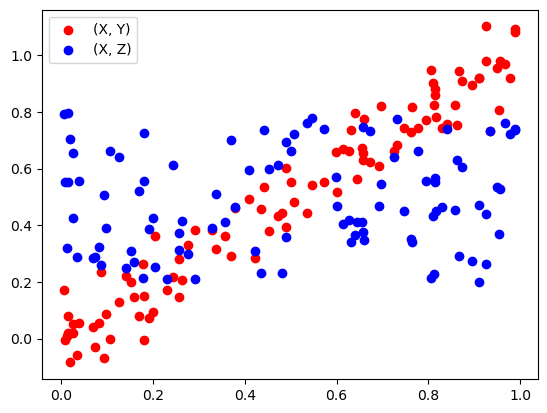

In [60]:
from matplotlib import pyplot as plt
n = 100 # sample size

# X is a random variable uniformly distributed on [0, 1]
x = np.random.rand(n)

# Y is a linear function of X plus noise
y = x + np.random.normal(0, 0.1, n)

# z is independent of X
z = np.random.uniform(0.2, 0.8, n)



# compute our own correlation coefficient
# corr(x,y) = cov(x,y) / (std(x) * std(y))

my_corr = lambda x, y: np.mean((x - x.mean()) * (y - y.mean()))/(np.std(x) * np.std(y))
print(my_corr(x, y))

# using numpy
# np.corrcoef returns a matrix M with the correlation coefficients [corr(x,x), corr(x,y); corr(y,x), corr(y,y)]
corr_matrix = np.corrcoef(x, y)
print(corr_matrix)


# scatter plot
fig, ax = plt.subplots()
# plot x vs y and x vs z, different colors, show name
ax.scatter(x, y, color='red', label='(X, Y)')
ax.scatter(x, z, color='blue', label='(X, Z)')
# show legend
ax.legend()
plt.show()



In [61]:
np.cov(x,y)

array([[0.10060322, 0.10299638],
       [0.10299638, 0.1120062 ]])

In [62]:
np.cov(x,z)

array([[0.10060322, 0.00723476],
       [0.00723476, 0.03116977]])